In [58]:
!pip install pandas geopy
!pip install folium
!pip install dbfread



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [59]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from dbfread import DBF

# Load data
landfills_df = pd.read_csv('landfill.csv')
water_bodies_df = pd.read_csv('water_bodies.csv')

In [4]:
water_bodies_df['Longitude'] = water_bodies_df['Longitude']*-1
water_bodies_df.head()

,Unnamed: 0,Name,Longitude,Latitude,PFHxS,PFOA,PFOS,PFBS,PFBA,PFDS,...,PFHxA,PFNS,PFNA,PFOSA,PFPES,PFPEA,PFTA,PFTRDA,PFuNDA,Total_PFAS
0,0,USGS 01094450 NORTH NASHUA RIR AT NORTH LOMINS...,-71.746389,42.542222,4.44,26.90,9.40,59.70,31.00,1.81,...,55.70,1.81,2.650,1.81,0.637,36.70,1.81,1.81,1.81,259.087
1,1,"USGS 01094455 NORTH NASHUA RIR AT LOMINSTR, MA",-71.737222,42.525833,4.15,26.50,10.10,49.60,28.40,1.78,...,49.10,1.78,2.570,1.78,0.528,33.70,1.78,1.78,1.78,236.418
2,2,"USGS 01094950 STILLWATR RIR AT WST STRLING, MA",-71.818611,42.446667,1.92,3.72,1.46,1.12,1.58,1.92,...,5.08,1.92,0.548,1.92,1.920,4.18,1.92,1.92,1.92,41.048
3,3,"USGS 01095920 NASHUA RIR NAR AYR, MA",-71.609722,42.578333,6.93,21.30,12.60,20.50,13.50,1.78,...,28.20,1.78,1.720,1.78,0.626,27.80,1.78,1.78,1.78,159.496
4,4,"USGS 01096603 ASSABT RIR NAR WSTBOROUGH, MA",-71.638611,42.279444,2.66,5.13,9.39,1.90,6.21,1.86,...,4.59,1.86,10.100,1.86,0.369,5.06,1.86,1.86,1.84,63.658


In [30]:
def distance(coord1, coord2):
    km = geodesic(coord1, coord2).km
    miles = km*0.621371
    return miles

def find_nearest_landfill(water_body):
    distances = landfills_df.apply(lambda row: distance((water_body['Latitude'], water_body['Longitude']),
                (row['Latitude'], row['Longitude'])), axis=1)
    nearest_index = distances.idxmin()
    return landfills_df.loc[nearest_index, 'Landfill ID'], distances.min()

def find_nearest_open_landfill(water_body):
    open_landfills_df = landfills_df[landfills_df['Current Landfill Status'].str.lower() == 'open']
    distances = open_landfills_df.apply(lambda row: distance((water_body['Latitude'], water_body['Longitude']),
                (row['Latitude'], row['Longitude'])), axis=1)
    nearest_index = distances.idxmin()
    return open_landfills_df.loc[nearest_index], distances.min()
    
def count_landfills(water_body, radius):
    distances = landfills_df.apply(lambda row: distance(
        (water_body['Latitude'], water_body['Longitude']),
        (row['Latitude'], row['Longitude'])), axis=1)
    count = np.sum(distances <= radius)
    return count

radius = 7
water_bodies_df['Nearest_Landfill'], water_bodies_df['Distance_miles'] = zip(*water_bodies_df.apply(find_nearest_landfill, axis=1))
water_bodies_df['Num_Landfills_within_'+str(radius)+'_miles'] = water_bodies_df.apply(lambda row: count_landfills(row, radius), axis=1)
water_bodies_df['Nearest_open_landfill'], water_bodies_df['Distance_to_Nearest_Open_Landfill'] = zip(*water_bodies_df.apply(lambda row: find_nearest_open_landfill(row), axis=1))

print(water_bodies_df['Distance_miles'])
print(water_bodies_df.head())
water_bodies_df.to_csv('waterfull.csv')

0      5.503803
1      5.996366
2      5.930053
3     12.454213
4      8.816526
        ...    
59     2.703973
60     3.821359
61     4.640234
62     1.980654
63     2.832495
Name: Distance_miles, Length: 64, dtype: float64
   Unnamed: 0                                               Name  Longitude  \
0           0  USGS 01094450 NORTH NASHUA RIR AT NORTH LOMINS... -71.746389   
1           1     USGS 01094455 NORTH NASHUA RIR AT LOMINSTR, MA -71.737222   
2           2     USGS 01094950 STILLWATR RIR AT WST STRLING, MA -71.818611   
3           3               USGS 01095920 NASHUA RIR NAR AYR, MA -71.609722   
4           4        USGS 01096603 ASSABT RIR NAR WSTBOROUGH, MA -71.638611   

    Latitude  PFHxS   PFOA   PFOS   PFBS   PFBA  PFDS  ...  PFPEA  PFTA  \
0  42.542222   4.44  26.90   9.40  59.70  31.00  1.81  ...  36.70  1.81   
1  42.525833   4.15  26.50  10.10  49.60  28.40  1.78  ...  33.70  1.78   
2  42.446667   1.92   3.72   1.46   1.12   1.58  1.92  ...   4.18  1.92   


In [6]:
water_bodies_df.head()

,Unnamed: 0,Name,Longitude,Latitude,PFHxS,PFOA,PFOS,PFBS,PFBA,PFDS,...,PFPEA,PFTA,PFTRDA,PFuNDA,Total_PFAS,Nearest_Landfill,Distance_miles,Num_Landfills_within_7_miles,Nearest_open_landfill,Distance_to_Nearest_Open_Landfill
0,0,USGS 01094450 NORTH NASHUA RIR AT NORTH LOMINS...,-71.746389,42.542222,4.44,26.90,9.40,59.70,31.00,1.81,...,36.70,1.81,1.81,1.81,259.087,787,5.503803,1,Unnamed: 0 21 Latitud...,5.503803
1,1,"USGS 01094455 NORTH NASHUA RIR AT LOMINSTR, MA",-71.737222,42.525833,4.15,26.50,10.10,49.60,28.40,1.78,...,33.70,1.78,1.78,1.78,236.418,787,5.996366,1,Unnamed: 0 21 Latitud...,5.996366
2,2,"USGS 01094950 STILLWATR RIR AT WST STRLING, MA",-71.818611,42.446667,1.92,3.72,1.46,1.12,1.58,1.92,...,4.18,1.92,1.92,1.92,41.048,800,5.930053,2,Unnamed: 0 21 Latitud...,6.421280
3,3,"USGS 01095920 NASHUA RIR NAR AYR, MA",-71.609722,42.578333,6.93,21.30,12.60,20.50,13.50,1.78,...,27.80,1.78,1.78,1.78,159.496,780,12.454213,0,Unnamed: 0 21 Latitud...,12.797948
4,4,"USGS 01096603 ASSABT RIR NAR WSTBOROUGH, MA",-71.638611,42.279444,2.66,5.13,9.39,1.90,6.21,1.86,...,5.06,1.86,1.86,1.84,63.658,802,8.816526,0,Unnamed: 0 21 Latitud...,20.850116


In [7]:
water_bodies_df.drop(['Unnamed: 0'], axis=1)

,Name,Longitude,Latitude,PFHxS,PFOA,PFOS,PFBS,PFBA,PFDS,PFDA,...,PFPEA,PFTA,PFTRDA,PFuNDA,Total_PFAS,Nearest_Landfill,Distance_miles,Num_Landfills_within_7_miles,Nearest_open_landfill,Distance_to_Nearest_Open_Landfill
0,USGS 01094450 NORTH NASHUA RIR AT NORTH LOMINS...,-71.746389,42.542222,4.440,26.90,9.40,59.70,31.00,1.81,3.680,...,36.70,1.810,1.810,1.810,259.087,787,5.503803,1,Unnamed: 0 21 Latitud...,5.503803
1,"USGS 01094455 NORTH NASHUA RIR AT LOMINSTR, MA",-71.737222,42.525833,4.150,26.50,10.10,49.60,28.40,1.78,4.030,...,33.70,1.780,1.780,1.780,236.418,787,5.996366,1,Unnamed: 0 21 Latitud...,5.996366
2,"USGS 01094950 STILLWATR RIR AT WST STRLING, MA",-71.818611,42.446667,1.920,3.72,1.46,1.12,1.58,1.92,1.920,...,4.18,1.920,1.920,1.920,41.048,800,5.930053,2,Unnamed: 0 21 Latitud...,6.421280
3,"USGS 01095920 NASHUA RIR NAR AYR, MA",-71.609722,42.578333,6.930,21.30,12.60,20.50,13.50,1.78,1.280,...,27.80,1.780,1.780,1.780,159.496,780,12.454213,0,Unnamed: 0 21 Latitud...,12.797948
4,"USGS 01096603 ASSABT RIR NAR WSTBOROUGH, MA",-71.638611,42.279444,2.660,5.13,9.39,1.90,6.21,1.86,0.659,...,5.06,1.860,1.860,1.840,63.658,802,8.816526,0,Unnamed: 0 21 Latitud...,20.850116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,USGS 011006065 SHAWSHN RIR AT BRIDG STRT NR TW...,-71.195122,42.594675,25.700,15.20,55.30,6.90,11.80,1.86,0.850,...,21.40,0.369,0.354,0.276,180.619,1836,2.703973,1,Unnamed: 0 21 Latitud...,33.855088
60,USGS 01108050 SAWMILL BROOK AT CONANT ST BRIDG...,-70.958792,41.958811,0.938,3.12,2.40,1.64,2.88,1.88,1.880,...,2.29,1.880,1.880,1.880,34.452,797,3.821359,3,Unnamed: 0 39 Latitude ...,6.947189
61,"USGS 01108055 SAWMILL BROOK AT ROUT 28, BRIDGW...",-70.968575,41.948906,1.430,3.39,3.78,2.12,7.25,1.87,1.870,...,44.20,1.870,1.870,1.870,120.837,797,4.640234,2,Unnamed: 0 39 Latitude ...,7.244487
62,"USGS 011006712 MRRIMACK RIR NAR HARHILL, MA",-71.086911,42.770483,1.900,6.42,5.10,2.52,3.91,3.85,3.850,...,6.97,3.850,3.850,3.850,77.725,10660,1.980654,1,Unnamed: 0 21 Latitud...,42.298058


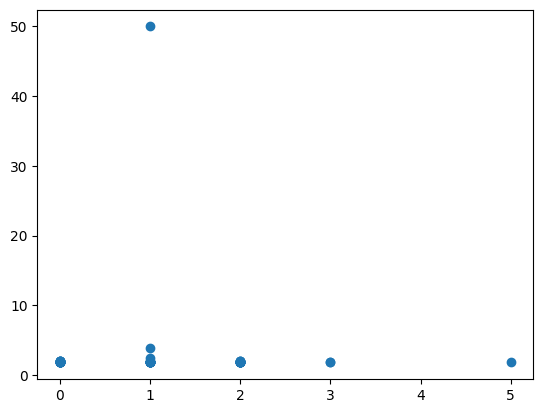

In [8]:
plt.scatter(water_bodies_df['Num_Landfills_within_7_miles'], water_bodies_df['PFDS'])

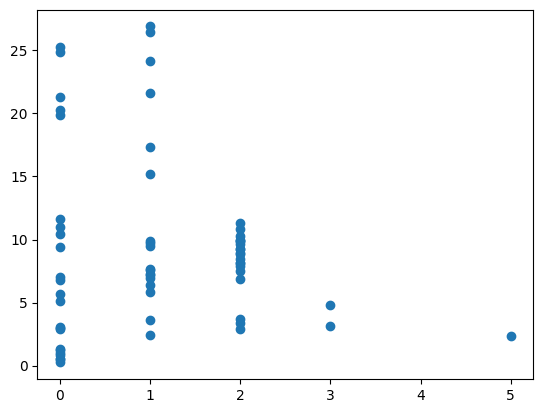

In [9]:
plt.scatter(water_bodies_df['Num_Landfills_within_7_miles'], water_bodies_df['PFOA'])

In [19]:
airports = pd.read_csv('airport.csv')

airports.head()
airports['LATITUDE']

0     42 11 52
1     42 47 45
2     42 09 28
3     41 51 36
4     41 25 20
        ...   
74    42 02 27
75    42 17 38
76    42 16 44
77    42 42 00
78    42 00 35
Name: LATITUDE, Length: 79, dtype: object

In [51]:
def decimal(longitude): 
    split = longitude.split()
    deg = int(split[0])
    minutes = int(split[1])
    sec = int(split[2])
    
    return deg + (minutes/60) + (sec/3600)

airports['Longitude']=airports['LONGITUDE'].apply(decimal)
airports['Latitude']=airports['LATITUDE'].apply(decimal)

airports['Longitude']=airports['Longitude']*-1
airports['Longitude']

0    -72.530556
1    -70.841667
2    -72.716111
3    -70.996667
4    -70.909444
        ...    
74   -71.616111
75   -71.496111
76   -71.547778
77   -71.216111
78   -70.843056
Name: Longitude, Length: 79, dtype: float64

In [52]:
def distairport(coord1, coord2):
    km = geodesic(coord1, coord2).km  
    miles = km * 0.621371  
    return miles

def nearest_airport(water_body):
    dist = airports.apply(
        lambda row: distairport(
            (water_body['Latitude'], water_body['Longitude']),  
            (row['Latitude'], row['Longitude'])  
        ), axis=1
    )
    nearest = dist.idxmin()
    
    return airports.loc[nearest, 'OBJECTID'], dist.min()

water_bodies_df['Nearest_Airport'], water_bodies_df['Distance_to_airport_in_miles'] = zip(
    *water_bodies_df.apply(nearest_airport, axis=1)
)


In [53]:
water_bodies_df.head()

,Unnamed: 0,Name,Longitude,Latitude,PFHxS,PFOA,PFOS,PFBS,PFBA,PFDS,...,PFTRDA,PFuNDA,Total_PFAS,Nearest_Landfill,Distance_miles,Num_Landfills_within_7_miles,Nearest_open_landfill,Distance_to_Nearest_Open_Landfill,Nearest_Airport,Distance_to_airport_in_miles
0,0,USGS 01094450 NORTH NASHUA RIR AT NORTH LOMINS...,-71.746389,42.542222,4.44,26.90,9.40,59.70,31.00,1.81,...,1.81,1.81,259.087,787,5.503803,1,Unnamed: 0 21 Latitud...,5.503803,14,1.051196
1,1,"USGS 01094455 NORTH NASHUA RIR AT LOMINSTR, MA",-71.737222,42.525833,4.15,26.50,10.10,49.60,28.40,1.78,...,1.78,1.78,236.418,787,5.996366,1,Unnamed: 0 21 Latitud...,5.996366,14,2.253749
2,2,"USGS 01094950 STILLWATR RIR AT WST STRLING, MA",-71.818611,42.446667,1.92,3.72,1.46,1.12,1.58,1.92,...,1.92,1.92,41.048,800,5.930053,2,Unnamed: 0 21 Latitud...,6.421280,41,2.033312
3,3,"USGS 01095920 NASHUA RIR NAR AYR, MA",-71.609722,42.578333,6.93,21.30,12.60,20.50,13.50,1.78,...,1.78,1.78,159.496,780,12.454213,0,Unnamed: 0 21 Latitud...,12.797948,42,4.514501
4,4,"USGS 01096603 ASSABT RIR NAR WSTBOROUGH, MA",-71.638611,42.279444,2.66,5.13,9.39,1.90,6.21,1.86,...,1.86,1.84,63.658,802,8.816526,0,Unnamed: 0 21 Latitud...,20.850116,77,4.655859


In [54]:

water_bodies_df.to_csv('water_bodies.csv', index=False)


In [57]:
# Replace 'your_file.dbf' with the path to your DBF file
dbf_file = DBF('your_file.dbf')

# Convert the DBF object into a pandas DataFrame
df = pd.DataFrame(iter(dbf_file))

# Display the DataFrame
df.head()


R-squared on Test Set: -0.6904025191116936
